## Post Secondary Education Statistics in Canada

##### In this project, we will be mainly taking a look at the postsecondary information readily available at the Statistics Canada website. 

##### Data Sources: 

##### 1. Statistics Canada.  Table 37-10-0112-02 Proportion of male and female postsecondary enrolments, by field of study and International Standard Classification of Education.

##### 2. Statistics Canada.  Table 37-10-0069-01 Postsecondary enrolments, by program type, credential type and International Standard Classification of Education (ISCED).

### 1. Insights

##### In this data visualization project, we had already used power query in Power BI to organize the data in the format we wanted, and created visuals. However we will format one of the data sources in python and export it to as an excel file just for practice. 

##### Granularity: All data to be summarized by Academic Year.

##### Insights we are going to gather from this data include: 

##### 1. Number of students by Program Type, Certificate Type, ISCED Type, Province, Age groups, Gender, Institution Type.
#####  2. Year over year change in student enrollment growth in numbers and percentage. Overall change in enrollment from 1993 to 2017.


### 2. Exploring and organizing data

In [1]:
#importing libraries needed ("pandas" to load dataset, "missingno" to check for missing values)
import pandas as pd
import missingno as msn

df = pd.read_csv(r"C:\Users\Emma\37100069.csv")

df.head(4)


,REF_DATE,GEO,DGUID,Institution type,Program type,Credential type,International Standard Classification of Education (ISCED),UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1992/1993,Canada,2016A000011124,"Total, institution type","Total, program type","Total, credential type","Total, International Standard Classification o...",Number,223,units,0,v79777748,1.1.1.1.1,1355451.0,NaN,NaN,NaN,0
1,1992/1993,Canada,2016A000011124,"Total, institution type","Total, program type","Total, credential type",Upper secondary education,Number,223,units,0,v79777749,1.1.1.1.2,NaN,..,NaN,NaN,0
2,1992/1993,Canada,2016A000011124,"Total, institution type","Total, program type","Total, credential type",Post-secondary non-tertiary education,Number,223,units,0,v79777750,1.1.1.1.3,420828.0,NaN,NaN,NaN,0
3,1992/1993,Canada,2016A000011124,"Total, institution type","Total, program type","Total, credential type",Short-cycle tertiary education,Number,223,units,0,v79777751,1.1.1.1.4,NaN,..,NaN,NaN,0


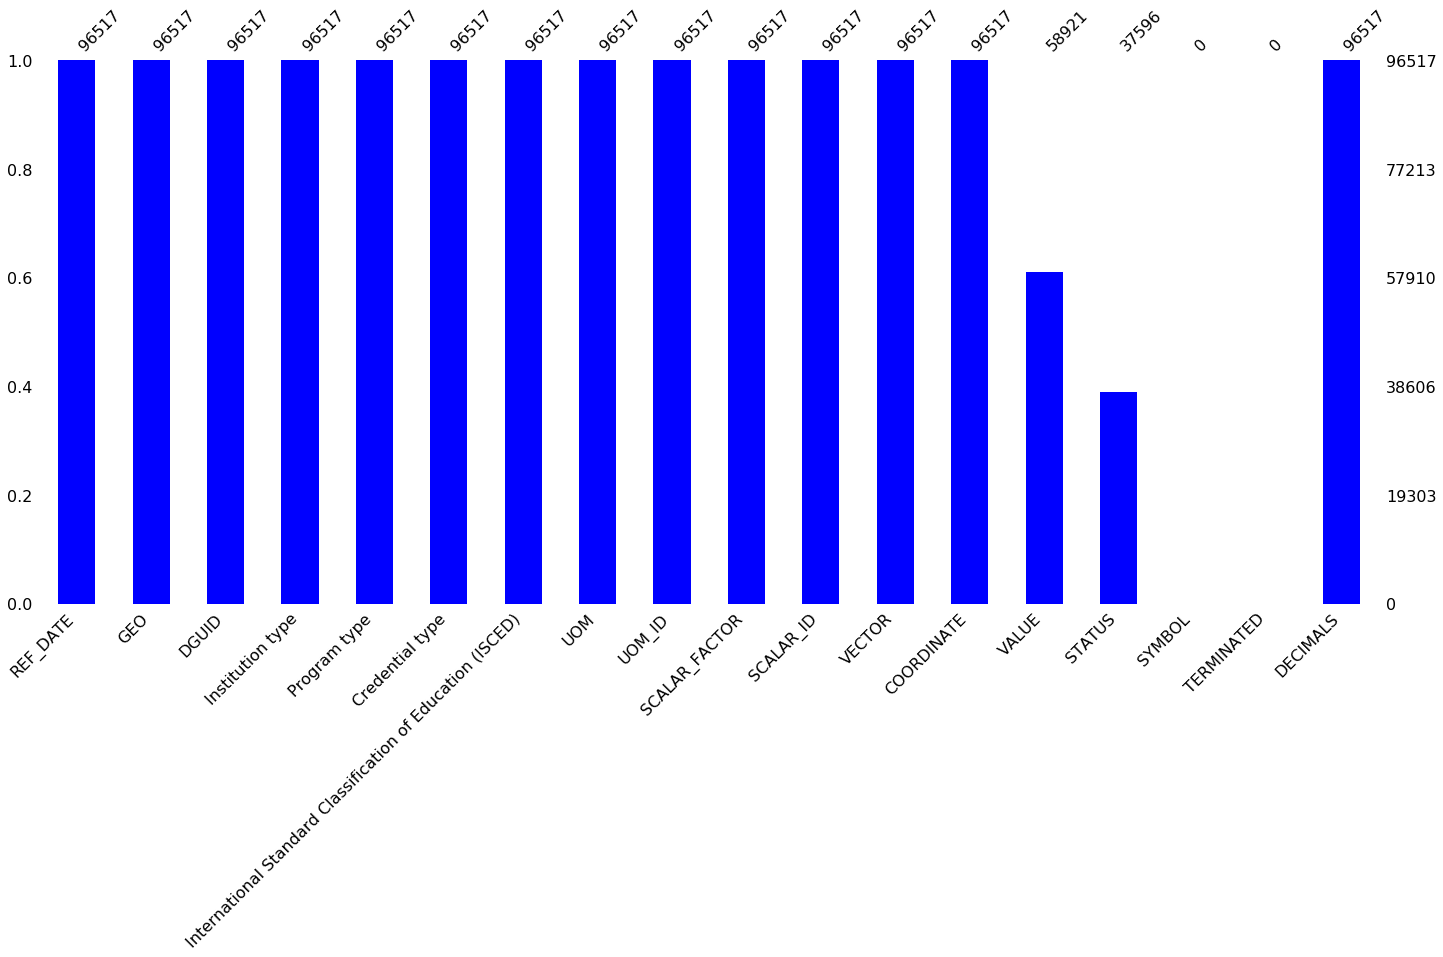

In [2]:
## using missingno library to check for missing data

msn.bar(df, color = 'blue')

In [3]:
print(df.columns)


Index(['REF_DATE', 'GEO', 'DGUID', 'Institution type', 'Program type',
       'Credential type',
       'International Standard Classification of Education (ISCED)', 'UOM',
       'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE',
       'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')


In [4]:
##drop columns

df=df.drop(columns=['UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE','STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'])

df.head(4)

,REF_DATE,GEO,DGUID,Institution type,Program type,Credential type,International Standard Classification of Education (ISCED),UOM,VALUE
0,1992/1993,Canada,2016A000011124,"Total, institution type","Total, program type","Total, credential type","Total, International Standard Classification o...",Number,1355451.0
1,1992/1993,Canada,2016A000011124,"Total, institution type","Total, program type","Total, credential type",Upper secondary education,Number,NaN
2,1992/1993,Canada,2016A000011124,"Total, institution type","Total, program type","Total, credential type",Post-secondary non-tertiary education,Number,420828.0
3,1992/1993,Canada,2016A000011124,"Total, institution type","Total, program type","Total, credential type",Short-cycle tertiary education,Number,NaN


In [5]:
##drop values where values have 'Total' and Value is null 

dropcodes = df[(df['GEO']=='Canada')|(df['VALUE'].isnull()) |(df['Institution type']=='Total, institution type')|(df['Program type']=='Total, program type')| (df['Credential type']=='Total, credential type')| (df['International Standard Classification of Education (ISCED)']=='Total, International Standard Classification of Education (ISCED)')].index
df2 = df.drop(dropcodes, inplace = False)

df2.head(5)






,REF_DATE,GEO,DGUID,Institution type,Program type,Credential type,International Standard Classification of Education (ISCED),UOM,VALUE
752,1992/1993,Newfoundland and Labrador,2016A000210,University,Undergraduate program,Diploma,Bachelor's or equivalent,Number,168.0
755,1992/1993,Newfoundland and Labrador,2016A000210,University,Undergraduate program,Degree (includes applied degree),Bachelor's or equivalent,Number,7671.0
756,1992/1993,Newfoundland and Labrador,2016A000210,University,Undergraduate program,Degree (includes applied degree),Master's or equivalent,Number,225.0
768,1992/1993,Newfoundland and Labrador,2016A000210,University,Health-related residency program,"Not applicable, credential type",Master's or equivalent,Number,198.0
774,1992/1993,Newfoundland and Labrador,2016A000210,University,Graduate program (second cycle),Degree (includes applied degree),Master's or equivalent,Number,1026.0


In [6]:
##Rename Column Value to "Number of Students"

df2.rename(columns={'VALUE':'Number of Students', 'GEO': 'Province', 'REF_DATE': 'Academic Year'}, inplace = True)

df2.head(5)

,Academic Year,Province,DGUID,Institution type,Program type,Credential type,International Standard Classification of Education (ISCED),UOM,Number of Students
752,1992/1993,Newfoundland and Labrador,2016A000210,University,Undergraduate program,Diploma,Bachelor's or equivalent,Number,168.0
755,1992/1993,Newfoundland and Labrador,2016A000210,University,Undergraduate program,Degree (includes applied degree),Bachelor's or equivalent,Number,7671.0
756,1992/1993,Newfoundland and Labrador,2016A000210,University,Undergraduate program,Degree (includes applied degree),Master's or equivalent,Number,225.0
768,1992/1993,Newfoundland and Labrador,2016A000210,University,Health-related residency program,"Not applicable, credential type",Master's or equivalent,Number,198.0
774,1992/1993,Newfoundland and Labrador,2016A000210,University,Graduate program (second cycle),Degree (includes applied degree),Master's or equivalent,Number,1026.0


In [7]:
## export to excel

# Use the openpyxl module as the Excel writer.
from openpyxl.workbook import Workbook
export_excel = df2.to_excel(r'C:\Users\Emma\Documents\datasets\37100069Amodified.xlsx')

### 3. Data visualization 
####     Excel workbook could have been loaded into Power BI to create the data visualizations, however original data had already been loaded in Power BI using powerquery, cleaned and modeled as required. Python "wand" library is used to convert the pdf image of the Power BI visualization to jpeg, so as to able to view a snapshot in github. 

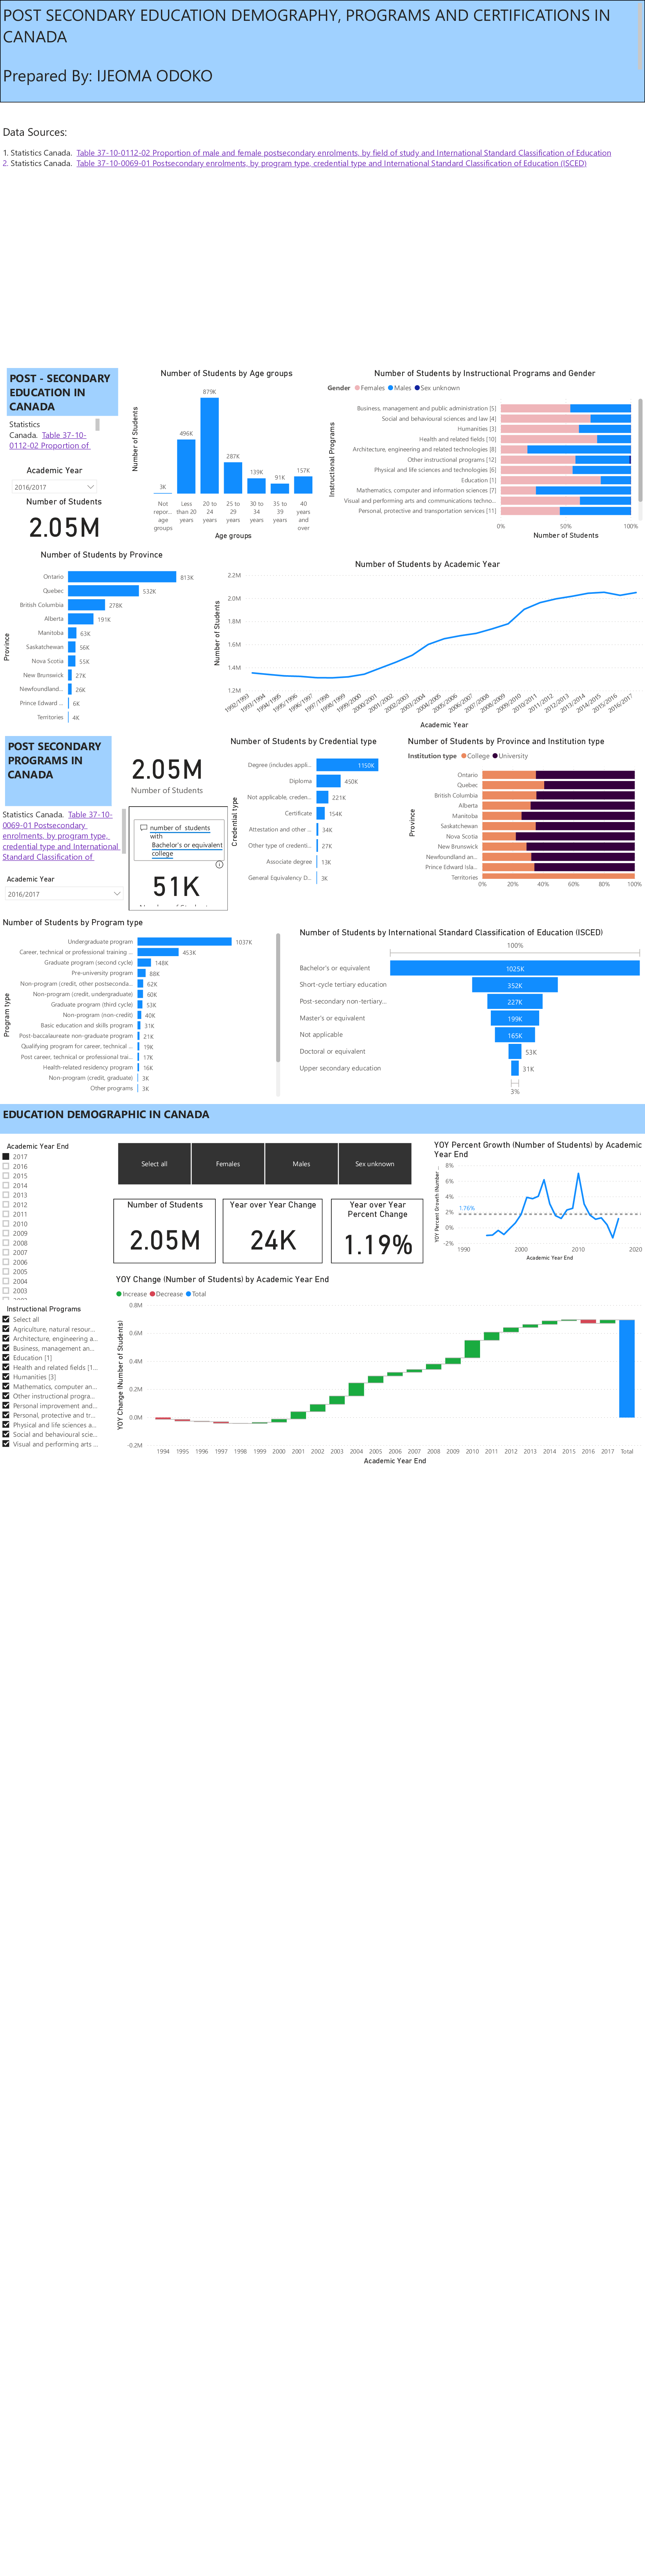

In [8]:
### convert pdf to jpeg, and cutoff pages from pdf not required.
from wand.image import Image as WI

PdfImage = WI(filename= r"C:\Users\Emma\Documents\Github folder\education stats in canada project\Canada - Post Secondary Education .pdf")  
pages = len(PdfImage.sequence)  

image = WI(  
  width=PdfImage.width,  
  height=PdfImage.height * pages  
)  
image.format=  "jpeg"

for i in range(pages):  
  image.composite(  
  PdfImage.sequence[i],  
  top=PdfImage.height * i,  
  left=0       
) 
  if i == 3:
    break
image

### 4. Conclusion

##### 1. As can be seen from the data, even in 2016/2017 the Science, Engineering, Technology programs are mostly male dominated. 
##### 2. Overall there has an average yearly growth of 1.76% from 1993 to 2017, also yearly enrollment from 1.35million (1993) to 2.05million (2017).
##### 3. Most preferred postsecondary education is still a Bachelor's degree. 
##### 3. As it to be expected, the largest provinces have the largest number of students. 